In [1]:
import os
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

In [11]:
path = 'predictions/motif_chem_trio_pretrained_wo_tie_embedding_prediction.csv'
pretrained_df = pd.read_csv(path)
path = 'predictions/motif_chem_trio_fine_tuned_wo_tie_embedding_prediction.csv'
fine_tuned_df = pd.read_csv(path)
path = 'motif_chem_trio_fine_tuned_wo_tie_embedding_prediction_early_stopping.csv'
early_stopping_df = pd.read_csv(path)

In [4]:
# create dir to store outputs
if not os.path.exists('./output'):
    os.mkdir('output')

In [21]:
for idx, row in df.iterrows():    
    # get mols only
    row = row[['original', 'reconstructed']]
    # read mols 
    row = {k: Chem.MolFromSmiles(x) for k, x in row.items()}
    
    # create sub-dir
    sub_path = 'output/{}'.format(idx)
    if not os.path.exists(sub_path):
        os.mkdir(sub_path)
        
    # draw and save to files
    for key, mol in row.items():
        Chem.Draw.MolToFile(mol, '{}/{}_{}.png'.format(sub_path, key, idx))

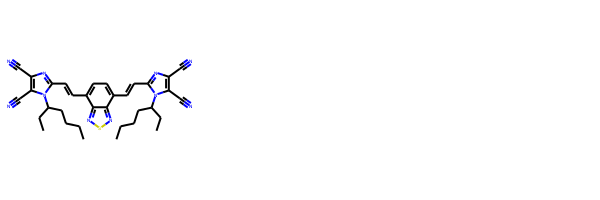

In [46]:
display(Draw.MolsToGridImage([Chem.MolFromSmiles(df.iloc[54]['original'])]))

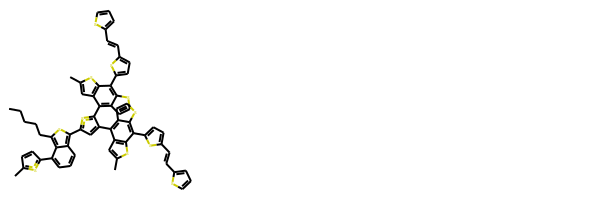

In [12]:
display(Draw.MolsToGridImage([Chem.MolFromSmiles(df.iloc[54]['reconstructed'])]))

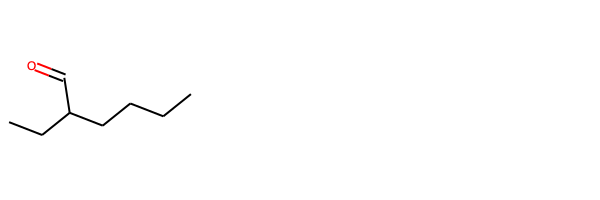

In [15]:
display(Draw.MolsToGridImage([Chem.MolFromSmiles(fine_tuned_df.iloc[41]['reconstructed'])]))

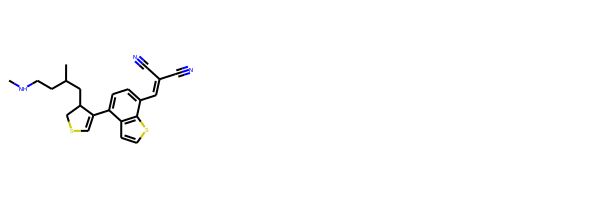

In [16]:
display(Draw.MolsToGridImage([Chem.MolFromSmiles(early_stopping_df.iloc[41]['reconstructed'])]))

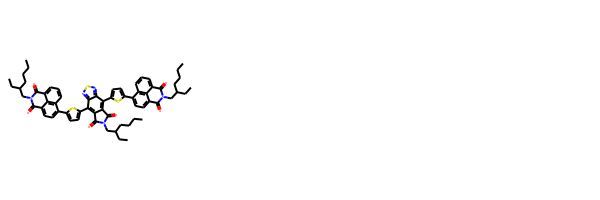

In [45]:
display(Draw.MolsToGridImage([Chem.MolFromSmiles(df.iloc[34]['original'])]))

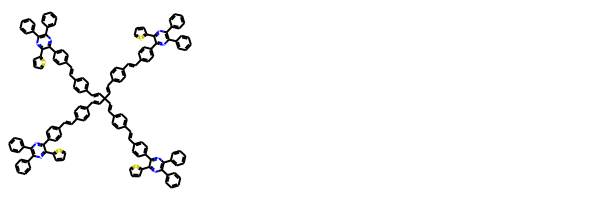

In [19]:
display(Draw.MolsToGridImage([Chem.MolFromSmiles(df.iloc[34]['reconstructed'])]))

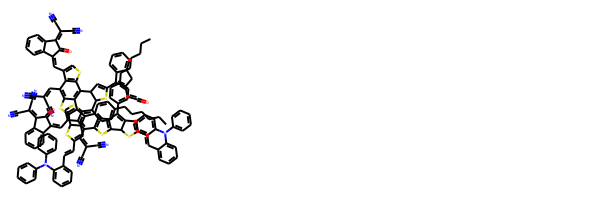

In [20]:
display(Draw.MolsToGridImage([Chem.MolFromSmiles(fine_tuned_df.iloc[28]['reconstructed'])]))

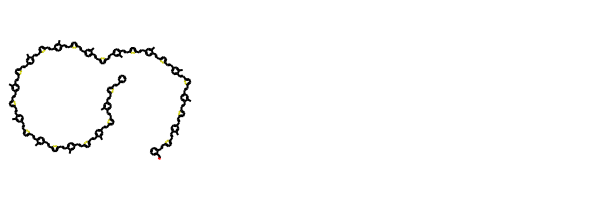

In [22]:
display(Draw.MolsToGridImage([Chem.MolFromSmiles(early_stopping_df.iloc[28]['reconstructed'])]))

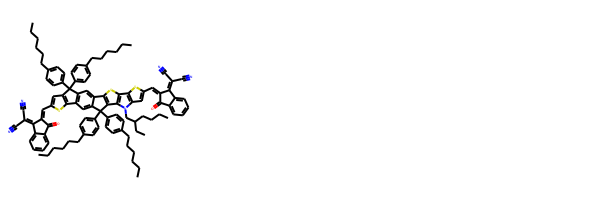

In [44]:
display(Draw.MolsToGridImage([Chem.MolFromSmiles(df.iloc[29]['original'])]))

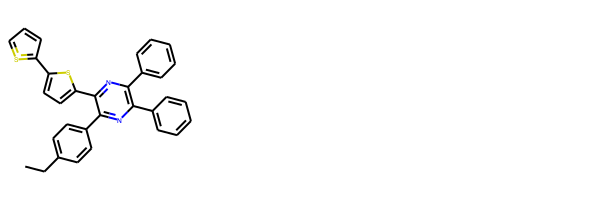

In [26]:
display(Draw.MolsToGridImage([Chem.MolFromSmiles(df.iloc[29]['reconstructed'])]))

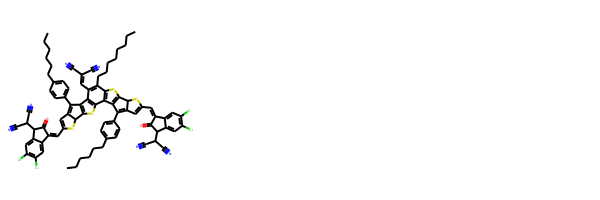

In [38]:
display(Draw.MolsToGridImage([Chem.MolFromSmiles(fine_tuned_df.iloc[21]['reconstructed'])]))

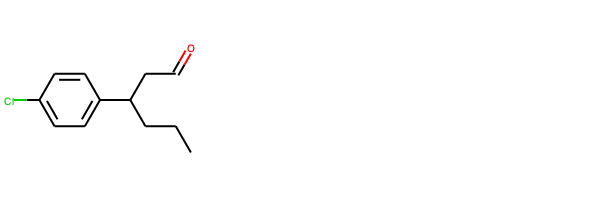

In [37]:
display(Draw.MolsToGridImage([Chem.MolFromSmiles(early_stopping_df.iloc[21]['reconstructed'])]))

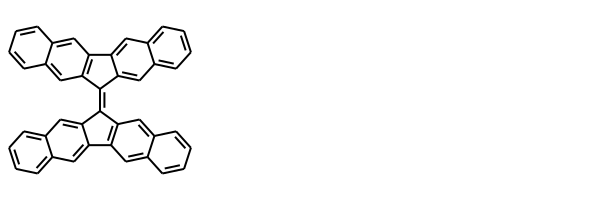

In [43]:
display(Draw.MolsToGridImage([Chem.MolFromSmiles(df.iloc[24]['original'])]))

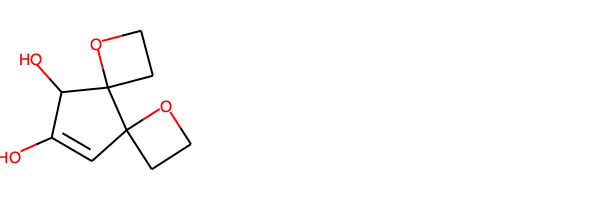

In [42]:
display(Draw.MolsToGridImage([Chem.MolFromSmiles(df.iloc[24]['reconstructed'])]))

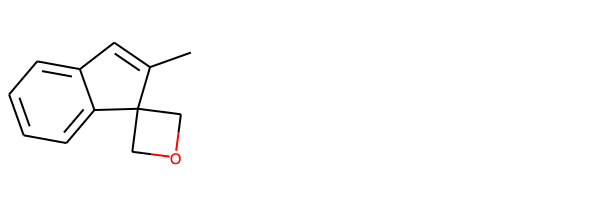

In [40]:
display(Draw.MolsToGridImage([Chem.MolFromSmiles(fine_tuned_df.iloc[19]['reconstructed'])]))

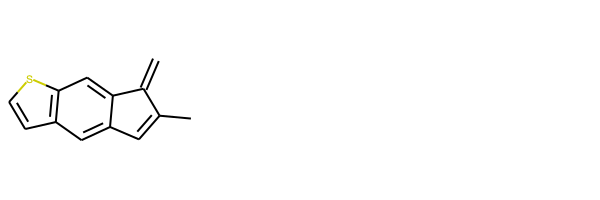

In [39]:
display(Draw.MolsToGridImage([Chem.MolFromSmiles(early_stopping_df.iloc[19]['reconstructed'])]))